# Importar librerias

In [ ]:
!pip install  rasterio
!pip install  pyspatialml

In [63]:
# Importar las librerias
import pandas as pd
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor # Random Forest y Random Forest Extra Trees
from sklearn.tree import DecisionTreeRegressor # Árbol de decisión
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio import *
from rasterio.plot import show
from pyspatialml import Raster

# Datos de la especie

In [40]:
df = pd.read_csv("/content/drive/MyDrive/Curso_distribucion/Inputs/Wettinia/Wettinia_kalbreyeri_raster.csv", sep=",",header=0) # Presencias y pseudo-ausencias
df.head()
#column_names = list(dataset.columns)
#column_names
#len(df)

,species,presencia,elevation,tpi,Tmin,Tmax,precipitat,population,fpp,clc
0,Wettinia_kalbreyeri,1,2190.0,-31.0,10.82500,20.65833,1410.04711,0.36076,0.13016,112.0
1,Wettinia_kalbreyeri,1,1803.0,26.0,14.90833,22.79167,2275.65463,0.25460,0.06304,122.0
2,Wettinia_kalbreyeri,1,1803.0,26.0,14.90833,22.79167,2275.65463,0.25460,0.06304,122.0
3,Wettinia_kalbreyeri,1,1803.0,26.0,14.90833,22.79167,2275.65463,0.25460,0.06304,122.0
4,Wettinia_kalbreyeri,1,1803.0,26.0,14.90833,22.79167,2275.65463,0.25460,0.06304,122.0


In [41]:
df = df.loc[:,['presencia','elevation','tpi','Tmin','Tmax','precipitat','population','fpp','clc']]

# Revisar los datos Nulos

In [42]:
# Revisar filas con valores nulos
filas_con_nulos = df.isnull().any(axis=1)
print(df[filas_con_nulos])

Empty DataFrame
Columns: [presencia, elevation, tpi, Tmin, Tmax, precipitat, population, fpp, clc]
Index: []


In [43]:
# Revisar columnas con valores nulos
columnas_con_nulos = df.isnull().any(axis=0)
print(df.loc[:, columnas_con_nulos])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1323 rows x 0 columns]


# Datos de entrenamiento

In [72]:
X = df.loc [:,['elevation','tpi','Tmin','Tmax','precipitat','population','clc']].values
y = df.loc[:,['presencia']].values
feat = df.loc [:,['elevation','tpi','Tmin','Tmax','precipitat','population','clc']].columns.values

In [73]:
# Double check that we select the right columns
feat

array(['elevation', 'tpi', 'Tmin', 'Tmax', 'precipitat', 'population',
       'clc'], dtype=object)

In [74]:
y.shape

(1323, 1)

In [75]:
X.shape

(1323, 7)

In [76]:
# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Models

DecisionTreeClassifier

In [77]:
dt = DecisionTreeRegressor(random_state = 0)
dt_score = cross_val_score(dt, X_train, Y_train, cv = None).mean()
print("Score: ", dt_score)

Score:  0.7828586971980742


RandomForestClassifier

In [78]:
rf = RandomForestRegressor(random_state = 0) 
rf_score = cross_val_score(rf, X_train, Y_train, cv = None).mean()
print("Score: ", rf_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Score:  0.857332717926675


ExtraTreesClassifier

In [79]:
et = ExtraTreesRegressor(random_state = 0) 
et_score = cross_val_score(et, X_train, y_train, cv = None).mean()
print("Score: ", et_score)

Score:  0.881114936152289


# Hiperparametrización

In [80]:
mf = ExtraTreesRegressor(max_depth=5, min_samples_split=4, random_state=0)
gs_mf = GridSearchCV(mf,
                    param_grid = {"n_estimators": range(100, 501, 50)},
                    scoring = None,
                    cv = None)
gs_mf.fit(X_train, y_train)
gs_mf.best_estimator_

ExtraTreesRegressor(max_depth=5, min_samples_split=4, n_estimators=400,
                    random_state=0)

# Modelo Final

In [81]:
mf = ExtraTreesRegressor(max_depth=5, min_samples_split=4, random_state=0)
mf.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=5, min_samples_split=4, random_state=0)

In [82]:
# Podemos hacer predicciones sobre nuestros datos de prueba
y_pred = mf.predict(X_test)

In [83]:
# Podemos evaluar nuestro modelo utilizando las métricas de RMSE y R2
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  0.20868240496593213
R2:  0.7999496707881055


# Seleccion de las variables relevantes

In [84]:
impt = [mf.feature_importances_, np.std([tree.feature_importances_ for tree in mf.estimators_],axis=1)]
ind = np.argsort(impt[0])

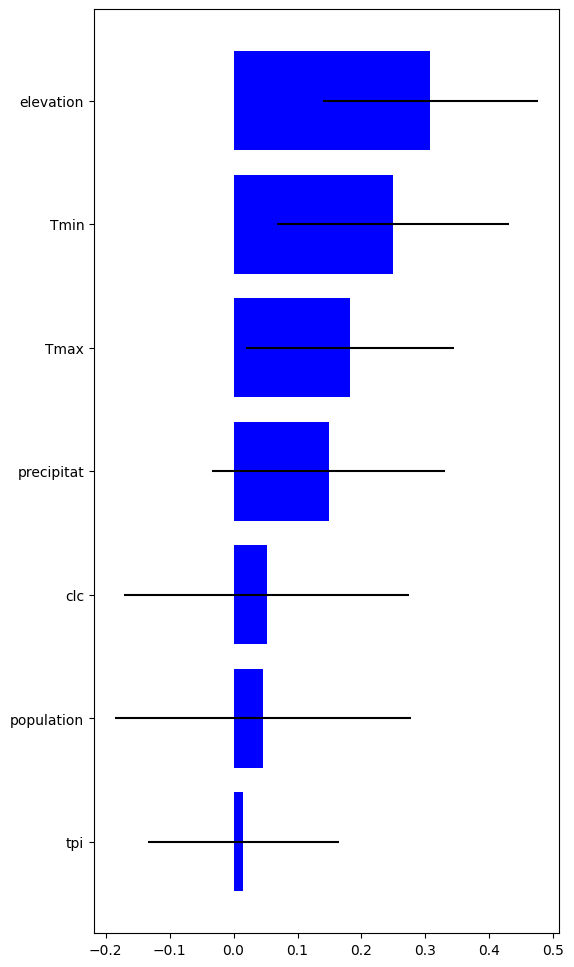

In [85]:
plt.rcParams["figure.figsize"] = (6,12)
plt.barh(range(len(feat)),impt[0][ind],color="b", xerr=impt[1][ind], align="center")
plt.yticks(range(len(feat)),feat[ind]);

# Predicción a partir de los datos ráster

In [86]:
# Cargar los datos raster de temperatura, precipitación y elevación
Tmax = rasterio.open('/content/drive/MyDrive/Curso_distribucion/Inputs/Tmax.tif') 
Tmin = rasterio.open('/content/drive/MyDrive/Curso_distribucion/Inputs/Tmin.tif')
precipitat =  rasterio.open('/content/drive/MyDrive/Curso_distribucion/Inputs/precipitation.tif') 
elevation = rasterio.open('/content/drive/MyDrive/Curso_distribucion/Inputs/elevation.tif')
population = rasterio.open('/content/drive/MyDrive/Curso_distribucion/Inputs/population.tif') 
#fpp = rasterio.open('/content/drive/MyDrive/Curso_distribucion/Inputs/Forest_prox_people.tif')
clc = rasterio.open('/content/drive/MyDrive/Curso_distribucion/Inputs/clc.tif') 
tpi = rasterio.open('/content/drive/MyDrive/Curso_distribucion/Inputs/tpi.tif')

In [87]:
rasters = [elevation,tpi,Tmin,Tmax,precipitat,population,fpp,clc]

In [88]:
# Verificar que todos los archivos tienen la misma resolución y sistema de referencia espacial (CRS)
for raster in rasters:
    print(raster.meta["width"], raster.meta["height"], raster.meta["crs"])

3921 4631 EPSG:4326
3921 4631 EPSG:4326
3921 4631 EPSG:4326
3921 4631 EPSG:4326
3921 4631 EPSG:4326
3921 4631 EPSG:4326
3921 4631 EPSG:4326
3921 4631 EPSG:4326


In [89]:
# Crear una matriz vacía para el stack y apilar los rasters en la matriz
stack = np.empty((Tmax.height, Tmax.width, len(rasters)), dtype=Tmax.dtypes[0])

for i, raster in enumerate(rasters):
    stack[:,:,i] = raster.read(1)

In [90]:
# Reorganizar el array de numpy para que tenga la forma (num_pixels, num_bands)
# Obtener dimensiones del array
num_bands, height, width = stack.shape

# Reorganizar array
stack= np.transpose(stack, (1, 2, 0))
stack = stack.reshape((height * width, num_bands))

In [92]:
result = mf.predict(stack)
#result = stack.predict(estimator=rf)

ValueError: ignored